IMPORTING LIBRARIES

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

LOAD DATASET

In [68]:
df=pd.read_csv('Advertising.csv')

In [69]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


EXPLORATORY DATA ANALYSIS

In [70]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [71]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [72]:
df = df.drop(columns="Unnamed: 0", axis=1)

In [73]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [74]:
df.shape

(200, 4)

CHECKING NULL VALUES

In [75]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [80]:
df.describe

<bound method NDFrame.describe of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]>

VISUALIZATION


In [102]:
df['TV'].value_counts()

199.8    2
109.8    2
17.2     2
177.0    2
222.4    2
        ..
139.3    1
216.8    1
199.1    1
26.8     1
232.1    1
Name: TV, Length: 190, dtype: int64

<Axes: xlabel='TV', ylabel='count'>

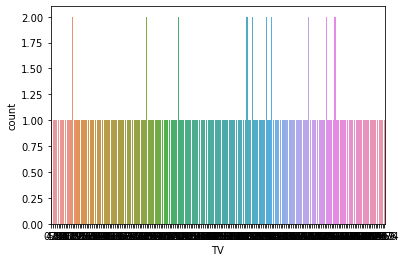

In [116]:

sns.countplot(x=df['TV'])


<Axes: xlabel='Radio', ylabel='count'>

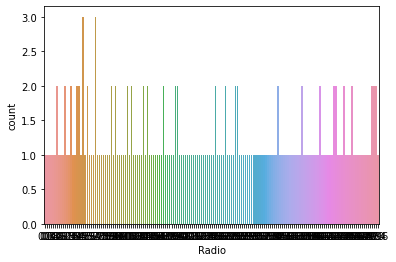

In [111]:
sns.countplot(x=df['Radio'])

<Axes: >

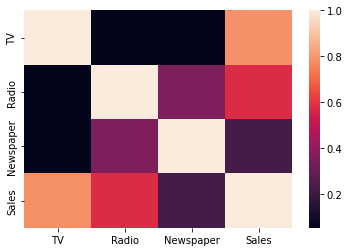

In [105]:
sns.heatmap(df.corr())

SPLITTING

In [82]:
X = df.drop(columns="Sales", axis=1)
Y = df.Sales

In [83]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [84]:
Y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [85]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [86]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(160, 3) (40, 3) (160,) (40,)


EVALUATING A MODEL

In [87]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [96]:
predict = model.predict(x_test)
predict

array([14.0533655 ,  9.3596964 ,  6.84168105, 15.57542062, 18.24566528,
       15.69705683,  7.30213681, 20.55741282, 12.91982687, 17.56977582,
       10.56954425, 19.44183679,  9.02152837, 10.39883137, 14.23578821,
       12.14385282,  8.89722911, 17.65602288, 16.59817803, 18.63325138,
       16.91499972, 16.20074839, 11.56907383, 11.79479752, 15.14324825,
       12.31833158, 15.39070301,  7.93709454, 16.78291467, 14.14997697,
       16.66592168, 16.81179836, 13.06481745, 12.90749021,  8.53383456,
       10.87895886, 21.98983006, 20.14333152, 16.31534821, 19.97848869])

In [98]:
metrics.mean_absolute_error(predict,y_test)
metrics.r2_score(predict,y_test)*100

70.9073476229551